https://github.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook

In [55]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
import numpy as np
import matplotlib
import sklearn
import statsmodels as sm
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [65]:
def read_dataset(folder, file, date_col=None):
    '''
    folder: is a Path object
    file: the CSV filename in that Path object. 
    date_col: specify a date_col to use as index_col 
    
    returns: a pandas DataFrame with a DatetimeIndex
    '''
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df

def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''	
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns) +1
    
    fig, ax = plt.subplots(nrows = subplots_size, ncols = 1, figsize=(12, subplots_size * 6.6), sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0])
    ax[0].set_title('Tabela sem missings')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()

def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data

    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores

In [63]:
folder = Path('/Users/danielferreira/Documents/git/classes/ASN/Séries Temporais/dados')

co2_original = read_dataset(folder, 'co2_original.csv', 'year')
co2_missing = read_dataset(folder, 'co2_missing_only.csv', 'year')


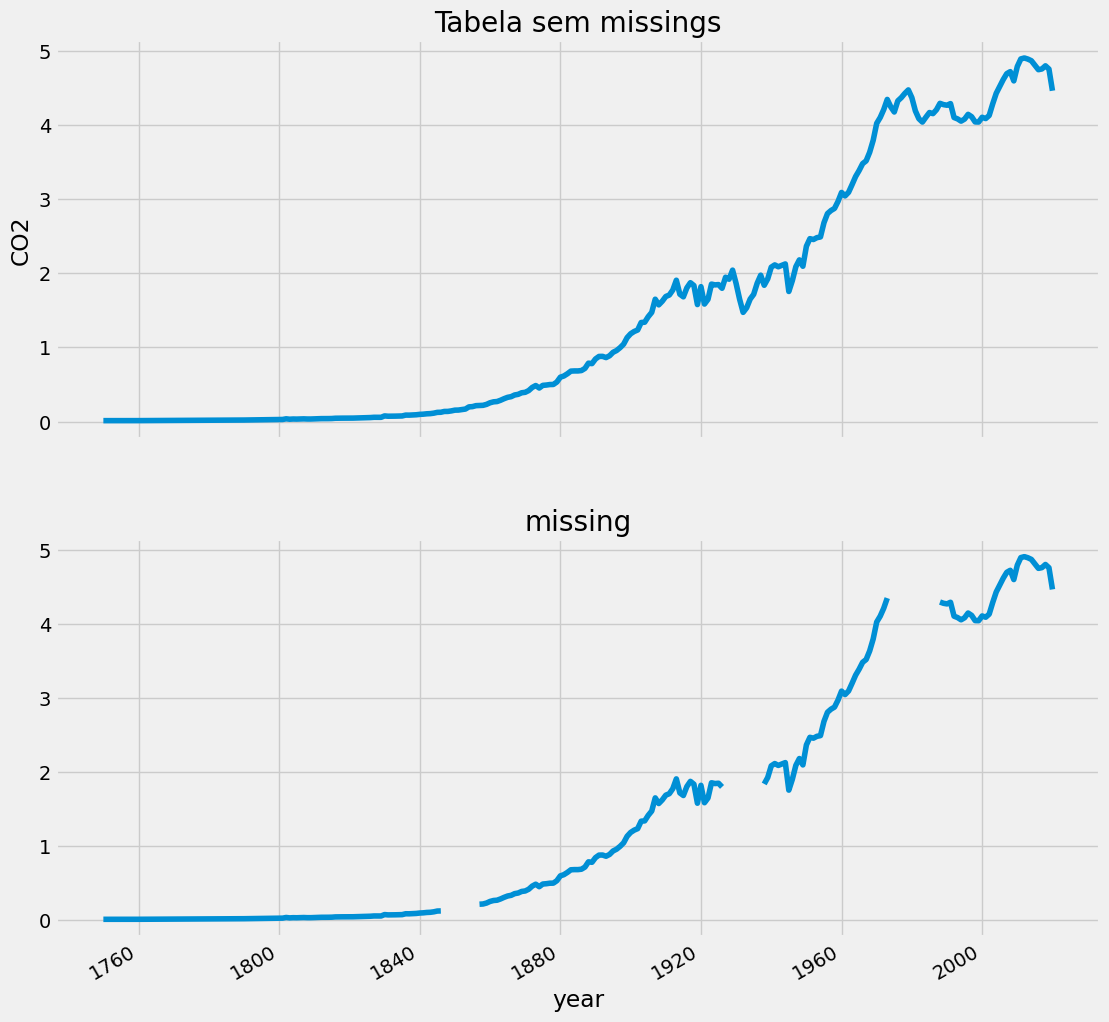

In [66]:
plot_dfs(co2_original, 
         co2_missing, 
         'co2',
         title="Emissões de  CO2 per Capita",
         xlabel="Ano",
         ylabel="CO2")

In [67]:
co2_missing['ffill'] = co2_missing['co2'].ffill()
co2_missing['bfill'] = co2_missing['co2'].bfill()
co2_missing['media'] = co2_missing['co2'].fillna(co2_missing['co2'].mean())
co2_missing['zero'] = co2_missing['co2'].fillna(0)
co2_missing['linear'] = co2_missing['co2'].interpolate(method='linear')
co2_missing['quadratic'] = co2_missing['co2'].interpolate(method='quadratic')

In [68]:

_ = rmse_score(co2_original, 
                    co2_missing, 
                    'co2')

RMSE for ffill: 0.05873012599267133
RMSE for bfill: 0.05550012995280968
RMSE for media: 0.7156383637041684
RMSE for zero: 1.1285178854727376
RMSE for linear: 0.05507291327761665
RMSE for quadratic: 0.08367561505614347


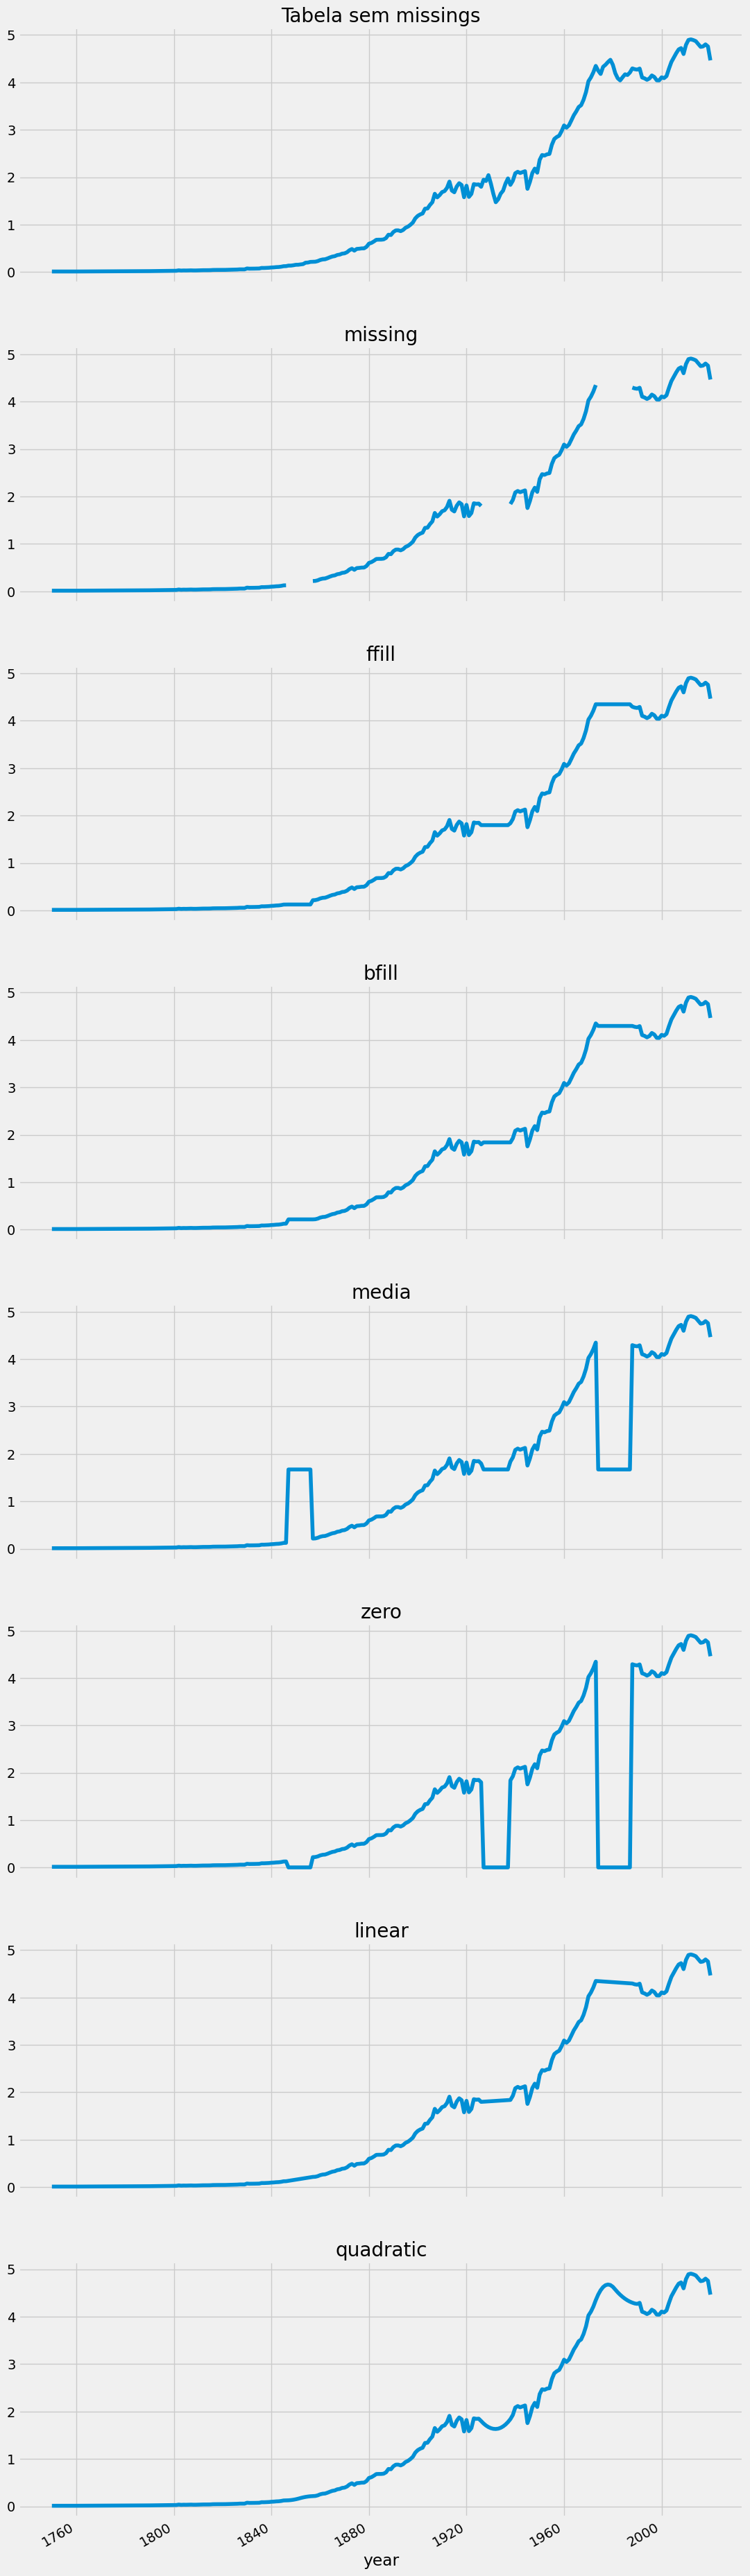

In [69]:
plot_dfs(co2_original, co2_missing, 'co2')